Checking if there is enough data by tuning and crossvalidating the model on subsets of data
Best model: SVM with polynomial kernel of degree 2

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [3]:
dataset = pd.read_csv("/home/alicja/Documents/ultimateData.csv")
dataset.set_index('label')

,thiG,siaM,imuB,pbpC,dhbE,anmK,irtA,group_2298,yvoA_3,group_2552,...,YP_003358396.1,YP_003358397.1,YP_002455933.1,YP_002455973.1,YP_002456003.1,YP_002456020.1,YP_003358384.1,YP_003358386.1,YP_003358385.1,value
label,,,,,,,,,,,,,,,,,,,,,
PSA-BAB-IMI-102140_14-1,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_lbl3,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
PSA-BAB-IMI-102140_lkd16,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_lma1,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
PSA-BAB-IMI-102140_luz19,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_luz24,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_luz7,3,3,3,3,2,2,2,2,2,1,...,1,1,0,0,0,0,1,1,1,0
PSA-BAB-IMI-102140_pb1,3,3,3,3,2,2,2,2,2,1,...,0,0,1,1,1,1,0,0,0,1
PSA-BAB-IMI-102141_14-1,3,3,3,3,2,2,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset['value'].value_counts()

0    2281
1     975
Name: value, dtype: int64

In [5]:
labels = dataset['value'].values
features = dataset.drop('value', axis=1).values

In [6]:
features = features[:,1:].astype(np.float32)

In [7]:
best_classifier = SVC(C=77358.56620434714, cache_size=512, class_weight=None,
  coef0=5694.538815205853, decision_function_shape='ovr', degree=2.0,
  gamma=758.5493658267706, kernel='poly', max_iter=707238803.0,
  probability=False, random_state=1, shrinking=True,
  tol=1.621850765788926e-05, verbose=False)

In [25]:
%%time
results = {}
for number in np.linspace(0.1, int(1),10):
    X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=number)
    svm = cross_val_score(best_classifier, X_test, y_test, cv=10)
    results[number] = svm
    

ValueError: test_size=1.000000 should be smaller than 1.0 or be an integer

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
full_score = cross_val_score(best_classifier, features, labels, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0))
results[1] = full_score

In [36]:
results

{0.1: array([0.66666667, 0.6969697 , 0.6969697 , 0.72727273, 0.60606061,
        0.6969697 , 0.66666667, 0.6875    , 0.6875    , 0.80645161]),
 0.2: array([0.72727273, 0.72727273, 0.6969697 , 0.75757576, 0.63076923,
        0.72307692, 0.61538462, 0.70769231, 0.734375  , 0.71875   ]),
 0.30000000000000004: array([0.70707071, 0.6969697 , 0.70707071, 0.67346939, 0.67010309,
        0.74226804, 0.74226804, 0.72164948, 0.70103093, 0.74226804]),
 0.4: array([0.82442748, 0.77099237, 0.76335878, 0.7480916 , 0.72519084,
        0.73076923, 0.73076923, 0.7       , 0.71317829, 0.7751938 ]),
 0.5: array([0.75460123, 0.7607362 , 0.7607362 , 0.74846626, 0.73619632,
        0.76687117, 0.72392638, 0.79754601, 0.80368098, 0.72670807]),
 0.6: array([0.75510204, 0.75      , 0.73469388, 0.76530612, 0.78061224,
        0.76923077, 0.77948718, 0.75384615, 0.72307692, 0.7628866 ]),
 0.7000000000000001: array([0.78508772, 0.76315789, 0.78947368, 0.78070175, 0.81140351,
        0.81140351, 0.74122807, 0.8026

Text(0,0.5,'CV score')

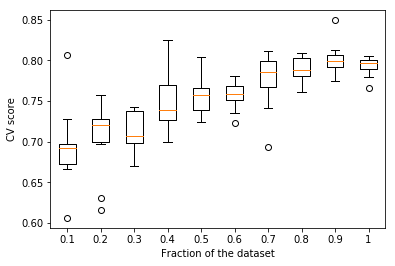

In [48]:
fig, ax = plt.subplots()
ax.boxplot(results.values())
ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_xlabel('Fraction of the dataset')
ax.set_ylabel('CV score')

In [1]:
fig.savefig('convergence.png')

NameError: name 'fig' is not defined